# Gradient Descent
### The Initial Problem
Let us say that we have a simple function, f(x)=x^2, and we want to find the minimum of this function. How would we do this? We could start by plotting the function, which we do below. Once we plot the function, we can clearly see that the global minimum is x=0. However, is there a better and more exact way for us to find the minimum?

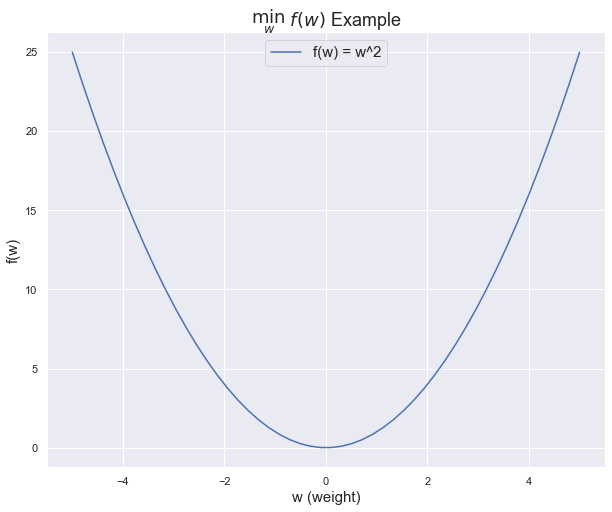

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Set Seaborn theme for plots
sns.set_theme()

# Define test function for experimenting
def f(w):
    return (w)**2

# Define domain variables for plotting f
domain = np.linspace(-5, 5, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = w^2")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

### Taking the derivative
Now one way that we can find the minimum of a function is by taking the derivative and then finding when the derivative is equal to zero. When we do this for f(x)=x^2, we get that the derivative is equal to 2x. Set 2x=0, we get that the function f(x)=x^2 has a critical point at x=0. However, we then have to take the second derivative to see if this critical point is a max, min, or saddle point. While these steps are easy to do with simple equations by hand, it gets a lot more complicated for complicated functions that we are trying to code. Thus, this is where gradient descent comes in.

### Initializing Gradient Descent
We initialize gradient descent by guessing a random point to be our minimum. In this case, we choose x=3 to be our guess, which we can see from the plot below.

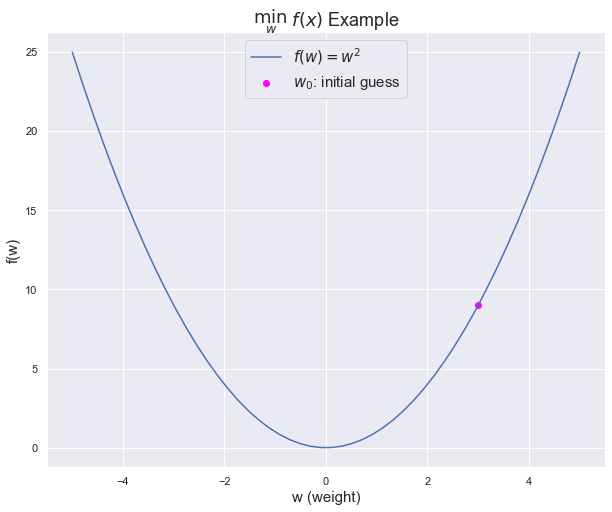

In [3]:
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2$")
plt.scatter([3], [f(3)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

### Calculate the Gradient
Now we calculate the gradient at this point. For this example, because the function is in 2-D, we only need to calculate the derivative. However, for functions in multiple dimensions, we need to calculate the gradient. 

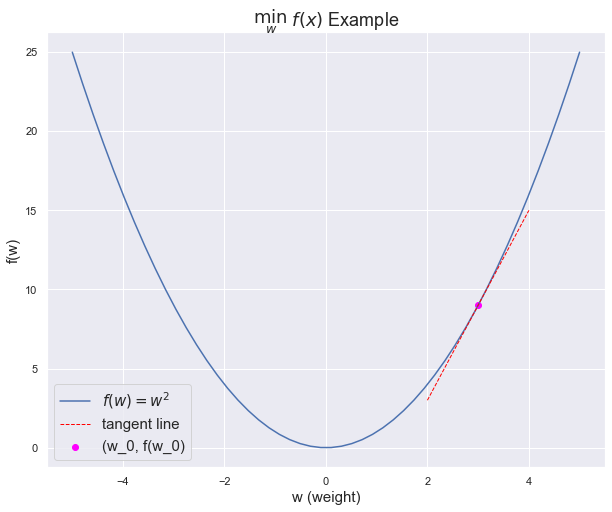

In [4]:
# Define parabola derivative
def df(w): 
    return 2*w

# Choose w_0
w_0 = 3.0

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i})")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = w^2$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

### Finding the next point
In order to find the minimum of a function, we now make a second guess for our point. We know that when trying to find a minimum, we must go in the opposite direct of our slope. For instance, if our slope is positive, we go towards the opposite direction (which in this case is left on our picture). To think about this with an example, imagine that you are hiking up a mountain. In order to come down, you always turn around and go in the opposite direction. Now how far do you go? This number is called the learning rate and is something that you just have to play around with. In this case, we set the learning rate to be 0.7, which as we can see from the graph, overshot a bit.

w_0 = 3.0
w_1 = -1.1999999999999993


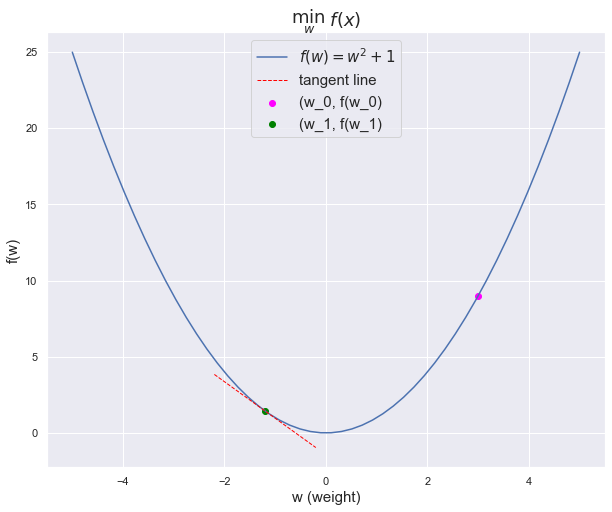

In [5]:
# Initialize choice of w
w_0 = 3.0

# Set learning rate 
alpha = .7

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*df(w_0)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()


### Find next point
Now let's repeat the same step above and find the next point. We can see that we are getting closer to the minimum!

w_0 = 3.0
w_1 = -1.1999999999999993
w_2 = 0.47999999999999954


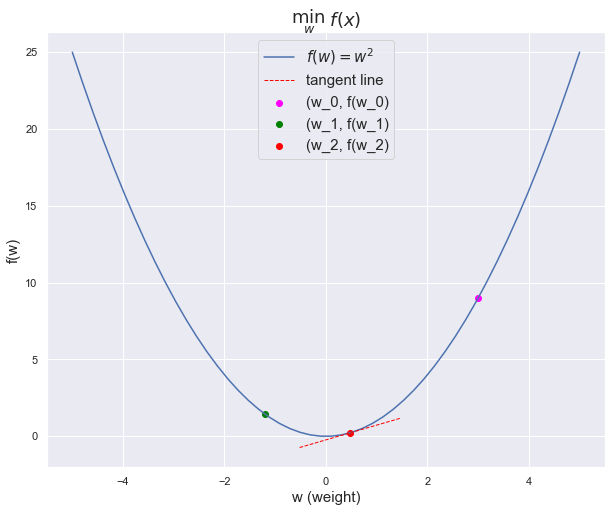

In [6]:
# Moving in the opposite direction of the derivative at w_1
w_2 = w_1 - alpha*df(w_1)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

### One more time!
Let's run the cell one more time! As we can see, we are really close now!

w_0 = 3.0
w_1 = -1.1999999999999993
w_2 = 0.47999999999999954
w_3 = -0.19199999999999973


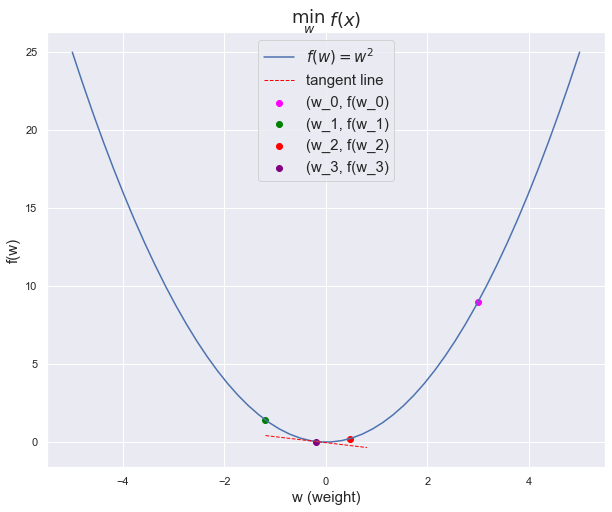

In [7]:
# Moving in the opposite direction of the derivative at w_2
w_3 = w_2 - alpha*df(w_2)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")
print(f"{w_3 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red", show = False)
tangent_line(w_3, f, df, i = 3, color = "purple")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

### Writing a definition
Now obviously copying and pasting the above steps over and over again is rather time consuming, so let's write a definition for the derivative descent that accomplishes the same idea that we implemented above. Now, it might be a little hard to get the derivative to be exactly zero, so we set a tolerance (which in this case is 0.001). 

w_0 = 3.0 | df(w_0) = 6.0
w_1 = -1.2 | df(w_1) = -2.3999999999999986
w_2 = 0.48 | df(w_2) = 0.9599999999999991
w_3 = -0.192 | df(w_3) = -0.38399999999999945
w_4 = 0.0768 | df(w_4) = 0.15359999999999974
w_5 = -0.03072 | df(w_5) = -0.061439999999999884
w_6 = 0.01229 | df(w_6) = 0.024575999999999945
w_7 = -0.00492 | df(w_7) = -0.009830399999999975
w_8 = 0.00197 | df(w_8) = 0.003932159999999988
w_9 = -0.00079 | df(w_9) = -0.001572863999999995
w_10 = 0.00031 | df(w_10) = 0.0006291455999999978



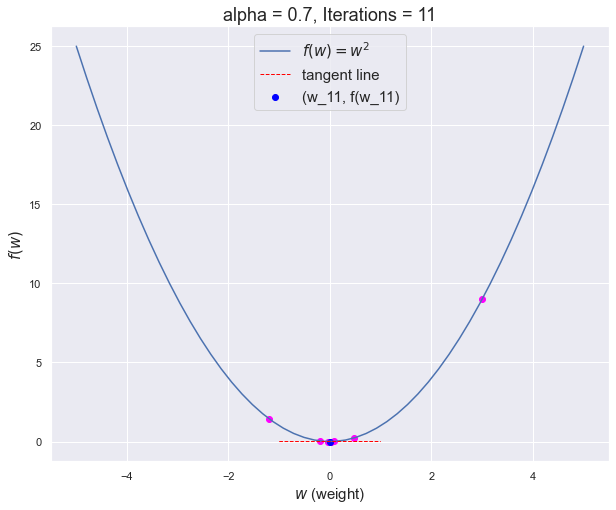

In [8]:
def derivative_descent(derivative, alpha = 0.7, w_0 = 3.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 5)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()


### Experimenting with various choices of alpha
Now one of the parameters that we have played with is the choice of alpha. Let's see what happens when we use different choices of alpha. As we can see from the graphs below, the smaller the alpha, the smaller each step is. This is like an inchworm slowly inching its way to the bottom. We also have larger alphas (like 0.5 and 0.7). For 0.5, we just happened to guess the right learning rate and it went straight to the minimum. However, we can see that for alpha = 0.7, we overshot a bit and had to jump around to reach the minimum. This could be equated to a frog hopping back and forth until it reaches the bottom. Finally, we can see that for alpha = 1, the points just go back and forth and never reach a minimum, while for alpha = 1.1, the points explode. This tells us that alpha (the learning rate) for this function should be less than 1.

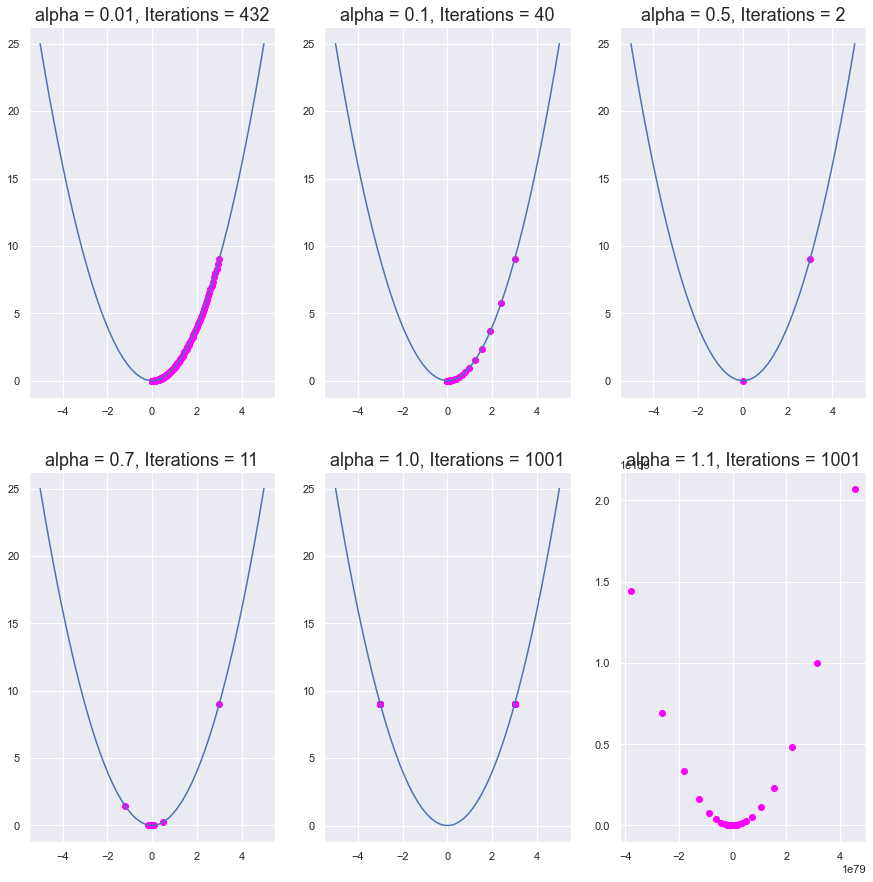

In [9]:
# Possible choices of learning rate 
alphas = [0.01, 0.1, 0.5, 0.7, 1.0, 1.1]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 3, figsize=(15,15))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)


### Functions with multiple minimums
Now for f(x) = x^2, we know that there is just one global minimum. However, what happens when there are multiple minimums? Let's find out with the sine function. First, let's plot the sine function. As we can see there are multiple minimums (in this case, three are shown).

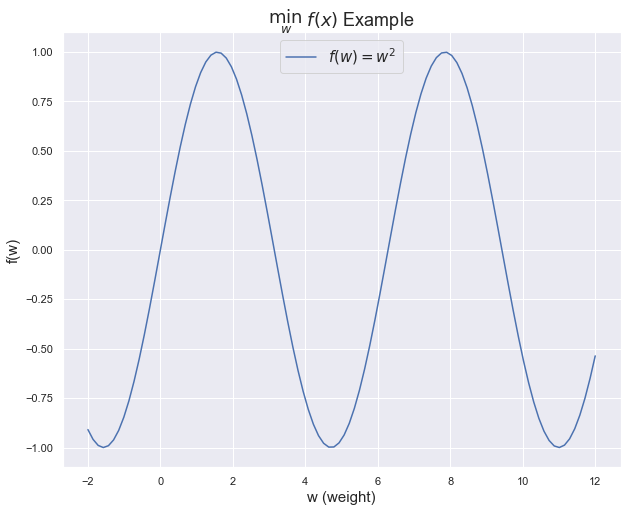

In [10]:
# Define test function for experimenting
def f(w):
    return np.sin(w)

# Define domain variables for plotting f
domain = np.linspace(-2, 12, 100)

plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2$")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

### Calculating the gradient
Nest, we calculate the gradient (or derivative in this case). As we know, the derivative for sine is just the cosine function. We now test out different weights (w_0) and see what happens. Uh-oh! We seem to be getting different minimums for different weights!

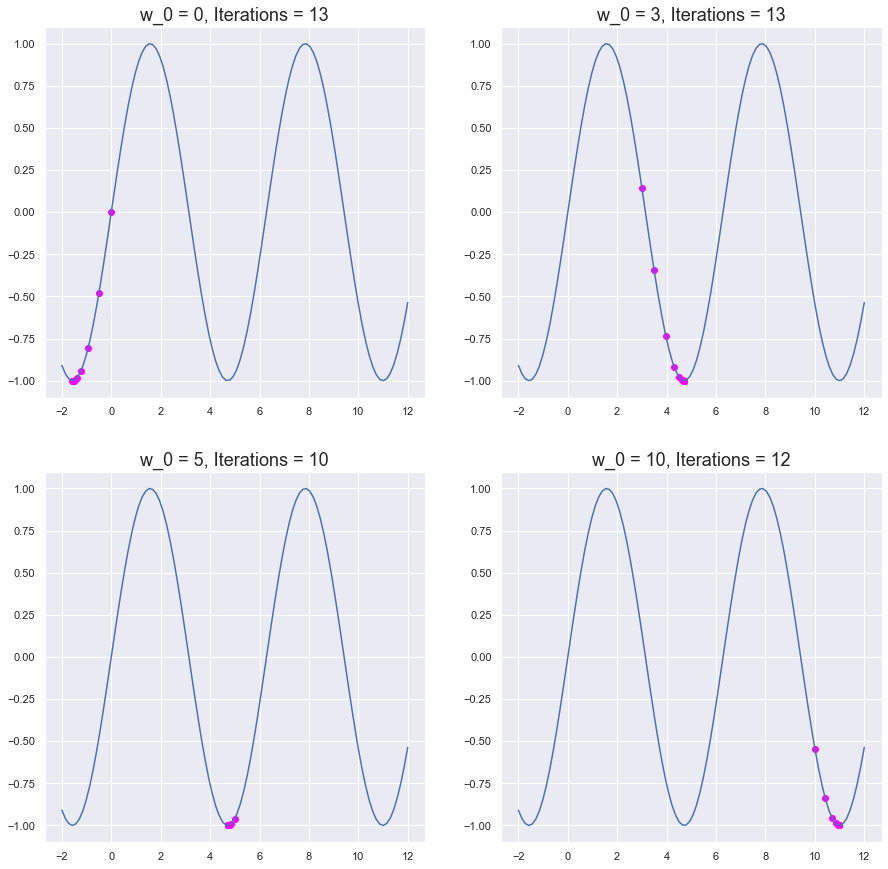

In [11]:
# Define parabola derivative
def df(w): 
    return np.cos(w)

# Possible choices of initial weight (w_0)
w_0s = [0, 3, 5, 10]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(15,15))

# Loop over the axs and alpha values
for ax, w_0 in zip(axs.flat, w_0s):
    W = derivative_descent(df, w_0 = w_0, alpha = 0.5)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"w_0 = {w_0}, Iterations = {len(W)}", fontsize = 18)

## Intro to Stochastic Gradient Descent
While I will explore Stochastic Gradient Descent in more detail in the next module (linear regression), here we can get a sample of it with the classic penguins dataset by using gradient descent in linear regression. Stochastic gradient descent uses the same concept for gradient descent as we explored above, only we do it for each individual data point now instead of a function. You can also read more about Stochastic Gradient Descent in the linear regression module.

### Load dataset
First let's load the penguins dataset.

In [58]:
penguins=pd.read_csv("palmer_penguins.csv")
penguins

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...,...
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Delete Missing Values
Now let's delete the missing values.

In [59]:
penguins.dropna (inplace = True)

### Countup
Let's create a new column that counts up correctly the values without missing values.

In [60]:
"""
Creates a new column, countup, that recounts all the rows to account for missing rows.
"""
penguins["countup"] = np.arange(penguins.shape[0])
penguins=penguins.reindex(columns=['countup', 'species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']) 
penguins

,countup,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...,...
338,328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Linear regression for flipper length vs. bill length
Let's set X to be the flipper length values for penguins and y to be the bill length for penguins.

In [61]:
X = penguins["flipper_length_mm"].values
X = X.reshape(-1, 1)
y = penguins.bill_length_mm

### Plot Data
Now let's plot the data to see what it looks like. It looks pretty linear!

Text(0, 0.5, 'Body Mass (g)')

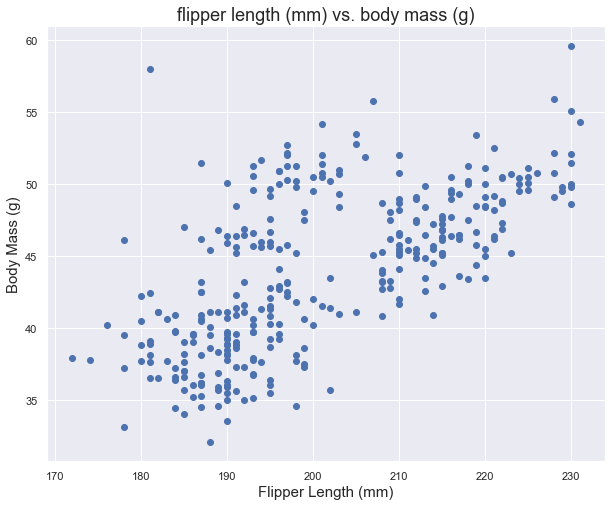

In [63]:
#Plot data
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.title("flipper length (mm) vs. body mass (g)", fontsize = 18)
plt.xlabel("Flipper Length (mm)", fontsize = 15)
plt.ylabel("Body Mass (g)", fontsize = 15)

### Initiate Linear Regression 
We now initiate linear regression and Stochastic Gradient Descent (which we use to minimize the error).

In [64]:
class SingleNeuron(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            if errors/N < 0.000001:
                return self
            else:
                self.errors_.append(errors/N)

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

### Define Activation Function
We also define the linear activation function to perform regression (vs classification or another method).


In [65]:
def linear_activation(z):
    return z

### Run and plot model
Now let's run and plot our model (as well as our error) to see how we did. As we can see, Stochastic Gradient Descent did a pretty good job at minimizing the error and making the best fit line!

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

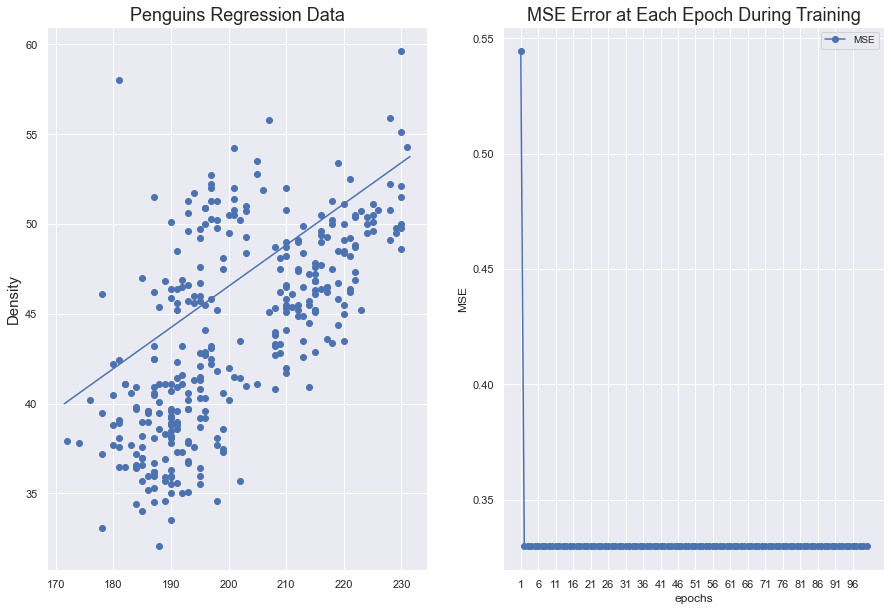

In [66]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .00002, epochs = 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

ax1.scatter(X, y)
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("", fontsize = 15)
ax1.set_ylabel("Density", fontsize = 15)
ax1.set_title("Penguins Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

## Takeaways
We now know how to find the minimums of various functions using gradient descent. You might be asking, why exactly is this useful? Well, gradient descent can be incredibly powerful in helping us minimize the error of data, which we will explore in more depth in the next module (linear regression), though we got a taste of it with the penguins dataset. 

Of course, there are a few things that we have to keep in mind. First, sometimes there can be multiple minimum for a given function, which can be problematic. Also, in using gradient descent to minimize error, there are actually multiple ways to implement gradient descent, which we will explore in more depth in the subsequent module.